# MNIST


In [1]:
import tensorflow as tf
import numpy as np
modelMNIST = tf.keras.models.Sequential()
modelMNIST.add(tf.keras.layers.Flatten())
modelMNIST.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
modelMNIST.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
modelMNIST.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
modelMNIST.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
from keras.datasets import mnist

(x_trainMNIST, y_trainMNIST), (x_testMNIST, y_testMNIST) = mnist.load_data()
x_trainMNIST = tf.keras.utils.normalize(x_trainMNIST, axis=1)
x_testMNIST = tf.keras.utils.normalize(x_testMNIST, axis=1)


Using TensorFlow backend.


In [3]:
x_testMNIST.shape

(10000, 28, 28)

In [4]:
modelMNIST.fit(x_trainMNIST,y_trainMNIST, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2655 - acc: 0.9217
Epoch 2/3
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1081 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0736 - acc: 0.9764


In [5]:
val_lossMNIST, val_accMNIST = modelMNIST.evaluate(x_testMNIST,y_testMNIST)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.1080 - acc: 0.9673


In [6]:
print("loss:",val_lossMNIST)
predictionsMNIST = modelMNIST.predict(x_testMNIST)


loss: 0.10798338177073746


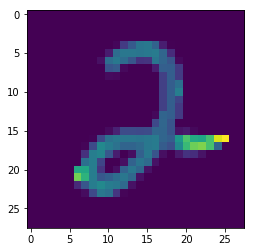

2


In [7]:

import random
indexMNIST = random.randint(0,999)
import matplotlib.pyplot as plt
plt.imshow(x_testMNIST[indexMNIST])
plt.show()
print(np.argmax(predictionsMNIST[indexMNIST]))


# MR BRAIN WITHOUT DATA AUGMENTATION


In [0]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

x_train = np.load('mrbraintrainx.npy')
y_train = np.load('mrbraintrainy.npy')
x_test = np.load('mrbraintestx.npy')
y_test = np.load('mrbraintesty.npy')

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [27]:
from keras.callbacks import ModelCheckpoint
filepath = "saved-model-{epoch:02d}-{val_acc:.2f}-no-aug.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=10, callbacks=[checkpoint], verbose=0)




Epoch 00001: val_acc improved from -inf to 0.45000, saving model to saved-model-01-0.45-no-aug.hdf5

Epoch 00002: val_acc did not improve from 0.45000

Epoch 00003: val_acc improved from 0.45000 to 0.50000, saving model to saved-model-03-0.50-no-aug.hdf5

Epoch 00004: val_acc did not improve from 0.50000

Epoch 00005: val_acc did not improve from 0.50000

Epoch 00006: val_acc did not improve from 0.50000

Epoch 00007: val_acc did not improve from 0.50000

Epoch 00008: val_acc did not improve from 0.50000

Epoch 00009: val_acc did not improve from 0.50000

Epoch 00010: val_acc did not improve from 0.50000

Epoch 00011: val_acc did not improve from 0.50000

Epoch 00012: val_acc did not improve from 0.50000

Epoch 00013: val_acc did not improve from 0.50000

Epoch 00014: val_acc did not improve from 0.50000

Epoch 00015: val_acc did not improve from 0.50000

Epoch 00016: val_acc did not improve from 0.50000

Epoch 00017: val_acc did not improve from 0.50000

Epoch 00018: val_acc did not 

In [10]:

val_loss, val_acc = model.evaluate(x_test,y_test)

20/20 [==============================] - 0s 76us/sample - loss: 0.7405 - acc: 0.4500


In [11]:
print("loss:",val_loss)
predictions = model.predict(x_test)


loss: 0.7405394911766052


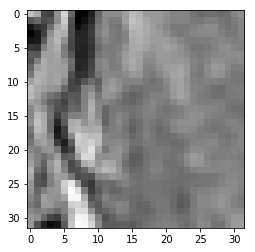

Not brain !


In [12]:
import random
index = random.randint(0,19)
import matplotlib.pyplot as plt
plt.imshow(x_test[index], cmap='gray')
plt.show()
if(np.argmax(predictions[index]) == 1):
  print('Brain !')
else:
  print('Not brain !')

# MR BRAIN WITH DATA AUGMENTATION


In [0]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,1)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

x_train = np.load('mrbraintrainx.npy')
y_train = np.load('mrbraintrainy.npy')
x_test = np.load('mrbraintestx.npy')
y_test = np.load('mrbraintesty.npy')

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [14]:
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

filepath = "saved-model-{epoch:02d}-{val_acc:.2f}-with-aug.hdf5"

x_train_augmented = x_train[:,:,:,np.newaxis]
x_test_augmented = x_test[:,:,:,np.newaxis]

datagen = ImageDataGenerator(horizontal_flip = True)

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.fit_generator(datagen.flow(x_train_augmented,y_train, batch_size=1000),steps_per_epoch=40,epochs=50,validation_data=(x_test_augmented,y_test),callbacks=[checkpoint])


Epoch 1/50
39/40 [============================>.] - ETA: 0s - loss: 0.6842 - acc: 0.5604
Epoch 00001: val_acc improved from -inf to 0.40000, saving model to saved-model-01-0.40-with-aug.hdf5
40/40 [==============================] - 4s 108ms/step - loss: 0.6836 - acc: 0.5616 - val_loss: 0.7130 - val_acc: 0.4000
Epoch 2/50
39/40 [============================>.] - ETA: 0s - loss: 0.6290 - acc: 0.6149
Epoch 00002: val_acc improved from 0.40000 to 0.50000, saving model to saved-model-02-0.50-with-aug.hdf5
40/40 [==============================] - 4s 98ms/step - loss: 0.6284 - acc: 0.6152 - val_loss: 0.7441 - val_acc: 0.5000
Epoch 3/50
39/40 [============================>.] - ETA: 0s - loss: 0.5853 - acc: 0.6422
Epoch 00003: val_acc did not improve from 0.50000
40/40 [==============================] - 4s 100ms/step - loss: 0.5848 - acc: 0.6428 - val_loss: 0.7273 - val_acc: 0.4500
Epoch 4/50
39/40 [============================>.] - ETA: 0s - loss: 0.5508 - acc: 0.6814
Epoch 00004: val_acc did 

In [15]:

val_loss, val_acc = model.evaluate(x_test_augmented,y_test)

20/20 [==============================] - 0s 61us/sample - loss: 0.8283 - acc: 0.5500


In [16]:
print("loss:",val_loss)
predictions = model.predict(x_test_augmented)


loss: 0.8282866477966309


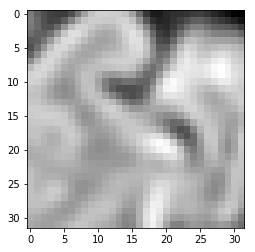

Not brain !


In [24]:
import random
index = random.randint(0,19)
import matplotlib.pyplot as plt
plt.imshow(x_test[index], cmap='gray')
plt.show()
if(np.argmax(predictions[index]) == 1):
  print('Brain !')
else:
  print('Not brain !')